Import and install neccesary libraries

In [1]:
# pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Gather Historical Stock Data

In [2]:
def fetch_stock_data(stock_symbol, start_date, end_date):
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    return stock_data

Calculate Daily Returns

In [11]:
def calculate_daily_returns(stock_data):

    # Interpolate missing values using linear method
    stock_data.interpolate(method='linear', inplace=True)

    stock_data['Daily_Return'] = stock_data['Close'].pct_change()
    return stock_data.dropna()

Prepare Features and Target

In [4]:
def prepare_data(stock_data, num_days):
    X = []
    y = []
    for i in range(len(stock_data) - num_days):
        X.append(stock_data['Daily_Return'][i:i+num_days])
        y.append(stock_data['Daily_Return'][i+num_days])
    return np.array(X), np.array(y)

Train and Evaluate Models

In [15]:
def train_and_evaluate_models(X_train, y_train, X_test, y_test):
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(),
        "Gradient Boosting": GradientBoostingRegressor()
    }

    best_model = None
    best_mse = float('inf')

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        if mse < best_mse:
            best_mse = mse
            best_model = model
    print("Best Model:", best_model)
    print("Best MSE:", best_mse)
    
    return best_model

Visualize Predictions

In [30]:
def visualize_predictions(actual_returns, predicted_returns, date_labels):
    plt.figure(figsize=(10, 6))

    num_predicted_returns = len(predicted_returns)
    x_ticks = np.arange(num_predicted_returns)  # Generate numerical tick positions

    plt.plot(x_ticks, actual_returns, label='Actual Returns')
    plt.plot(x_ticks, predicted_returns, label='Predicted Returns')

    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.title('Actual vs. Predicted Returns')
    
    formatted_date_labels = [date.strftime('%Y-%m-%d') for date in date_labels]
    
    plt.xticks(x_ticks, formatted_date_labels, rotation=45)  # Use date labels as x-axis ticks
    plt.tight_layout()
    plt.show()

In [ ]:
def visualize_predictions(predicted_returns, date_labels):
    plt.figure(figsize=(10, 6))

    num_predicted_returns = len(predicted_returns)
    x_ticks = range(num_predicted_returns)

    plt.plot(x_ticks, predicted_returns, label='Predicted Returns')

    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.title('Predicted Returns')

    # Format date labels to display only the date (no time)
    formatted_date_labels = [date.strftime('%Y-%m-%d') for date in date_labels]
    
    plt.xticks(x_ticks, formatted_date_labels, rotation=45)
    plt.tight_layout()
    plt.show()

Main Function

[*********************100%***********************]  1 of 1 completed
Best Model: LinearRegression()
Best MSE: 7.699791122669144e-05
        Date  Predicted_Return
0 2023-08-01          0.001103
1 2023-08-02          0.001103
2 2023-08-03          0.001103
3 2023-08-04          0.001103
4 2023-08-07          0.001103
5 2023-08-08          0.001103
6 2023-08-09          0.001103


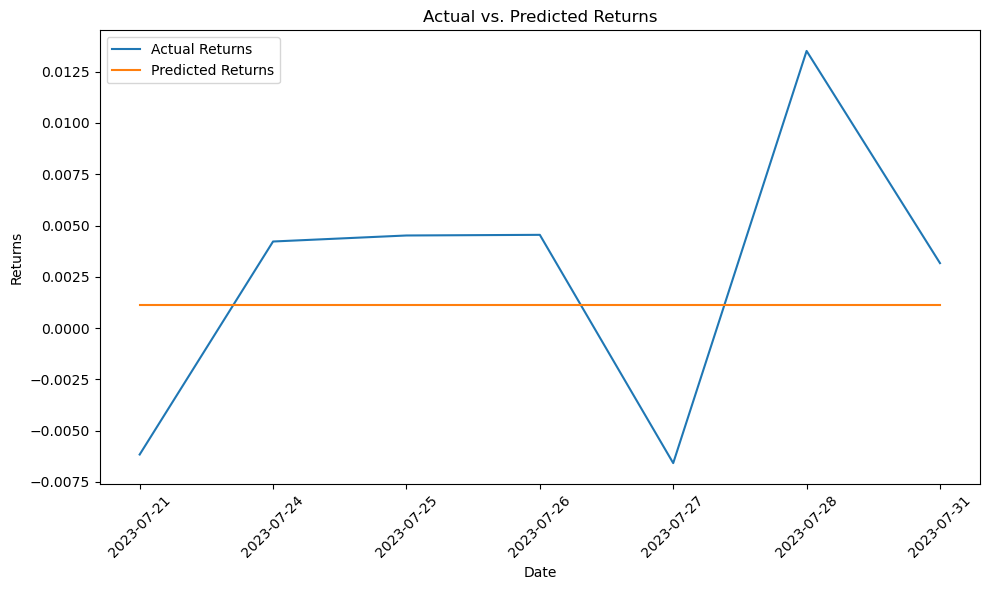

In [31]:
if __name__ == "__main__":
    stock_symbol = "AAPL"  # Replace with the stock symbol you're interested in
    start_date = "2023-01-01"
    end_date = "2023-08-01"
    num_days = 7

    stock_data = fetch_stock_data(stock_symbol, start_date, end_date)
    daily_returns_data = calculate_daily_returns(stock_data)
    X, y = prepare_data(daily_returns_data, num_days)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    best_model = train_and_evaluate_models(X_train, y_train, X_test, y_test)
    
    # Predict one week of returns using the best model
    last_week_data = daily_returns_data['Daily_Return'][-num_days:]
    predicted_returns = best_model.predict([last_week_data] * 7)  # Repeat for 7 days
    
    # Create a range of dates for the upcoming week
    prediction_dates = pd.date_range(start=end_date, periods=7, freq='B')
    date_labels = daily_returns_data.index[-num_days:]
    
    # Create a DataFrame with dates and corresponding predicted returns
    prediction_df = pd.DataFrame({'Date': prediction_dates, 'Predicted_Return': predicted_returns})

    print(prediction_df)

    visualize_predictions(daily_returns_data['Daily_Return'][-len(predicted_returns):], predicted_returns, date_labels)